In [ ]:
%pip install tensorflow

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Model
from keras.layers import Dense, Flatten, Input
from keras import utils as np_utils
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [31]:
news = pd.read_csv(r'C:\Users\darias\Desktop\UKR-MODELS\src\data\StyloMetrix_Vectors\news_kaggle_large.csv',  sep=";", decimal=",", 
                   skiprows=[1,2,3,4], low_memory=False, on_bad_lines='skip').sort_values(by=["CODE"])

labels = pd.read_csv(r"C:\Users\darias\Desktop\UKR-MODELS\src\data\kaggle_news\train_large.csv", low_memory=False, on_bad_lines='skip')
print(labels.shape)
print(news.shape)

(49533, 4)
(49527, 102)


In [32]:
labels

,Id,title,text,source
0,1,До річниці локдауну. У Китаї випустили докумен...,Напередодні річниці 76-денно локдауну в Ухані ...,1
1,4,Німеччина послабила контроль на кордонах з кіл...,Німеччина та Люксембург знову відкрили свій ав...,4
2,6,На адміністративних ролях. Як Олег Денис із So...,Однокурсник засновника SoftServe Юрія Василика...,1
3,7,Великобританія виявила ще один штам коронавіру...,Дослідники з Единбурзького університету виявил...,6
4,8,В Україні зростають продажі нових автомобілів....,За перші чотири місяці 2017 року на українсько...,1
...,...,...,...,...
49528,82547,В Осло озброєний чоловік викрав швидку і збив ...,У норвезькій столиці Осло невідомий захопив ав...,4
49529,82549,Скільки держава витрачає на маски,1 квітня Уряд посилив заходи безпеки для борот...,3
49530,82550,Оптимізм: фондові ринки почали зростати на нов...,На тлі оптимістичних новин про успіхи в розроб...,6
49531,82551,"У посольстві США назвали два головних виклики,...",На думку тимчасової повіреної у справах США в ...,2


In [20]:
X = news.drop(columns="CODE").values
y = labels

In [21]:
# Normalize data
sc = StandardScaler()
X = sc.fit_transform(X)

In [24]:
print(len(labels))
print(len(news))

49533
49527


In [22]:
# Split the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

ValueError: Found input variables with inconsistent numbers of samples: [49527, 49533]

In [142]:
# Encode the categories
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_Y = encoder.transform(y_train)
train_l = np_utils.to_categorical(encoded_Y)

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [144]:
encoder.fit(y_test)
encoded_Y_test = encoder.transform(y_test)
test_l = np_utils.to_categorical(encoded_Y_test)

array([[0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [145]:
def build_model():
    x = Input(shape=(101), dtype=tf.float32)
    x = Flatten()(x)
    output = Dense(4, activation='softmax')(x)

    model = Model(inputs=x, outputs=output)

    model.compile(optimizer="Adam", loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=["accuracy"])
    return model

In [146]:
model = build_model()
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 101)]             0         
                                                                 
 dense_7 (Dense)             (None, 4)                 408       
                                                                 
Total params: 408
Trainable params: 408
Non-trainable params: 0
_________________________________________________________________


In [147]:
model.fit(x_train, train_l, batch_size = 32, epochs = 20, verbose=1, validation_data=(x_test, test_l))

Epoch 1/20
503/503 [==============================] - 1s 2ms/step - loss: 0.3564 - accuracy: 0.8674 - val_loss: 0.2212 - val_accuracy: 0.9495
Epoch 2/20
503/503 [==============================] - 1s 2ms/step - loss: 0.1816 - accuracy: 0.9552 - val_loss: 0.1476 - val_accuracy: 0.9614
Epoch 3/20
503/503 [==============================] - 1s 1ms/step - loss: 0.1326 - accuracy: 0.9645 - val_loss: 0.1135 - val_accuracy: 0.9701
Epoch 4/20
503/503 [==============================] - 1s 1ms/step - loss: 0.1064 - accuracy: 0.9695 - val_loss: 0.0935 - val_accuracy: 0.9726
Epoch 5/20
503/503 [==============================] - 1s 1ms/step - loss: 0.0898 - accuracy: 0.9732 - val_loss: 0.0797 - val_accuracy: 0.9756
Epoch 6/20
503/503 [==============================] - 1s 1ms/step - loss: 0.0783 - accuracy: 0.9760 - val_loss: 0.0701 - val_accuracy: 0.9776
Epoch 7/20
503/503 [==============================] - 1s 1ms/step - loss: 0.0699 - accuracy: 0.9772 - val_loss: 0.0626 - val_accuracy: 0.9791
Epoch 

In [150]:
y_pred = [int(np.argmax(i)) for i in model.predict(x_test)]
encoder.fit(y_pred)
Y_predict = encoder.transform(y_pred)
predict_l = np_utils.to_categorical(Y_predict)

126/126 [==============================] - 0s 928us/step


array([[0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of ticklabels (4019).

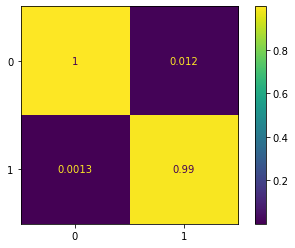

In [157]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

con_mat_df = multilabel_confusion_matrix(test_l, predict_l)
cmn = con_mat_df.astype('float') / con_mat_df.sum(axis=1)[:, np.newaxis]

# for confusion_matrix in cmn:
#     disp = ConfusionMatrixDisplay(confusion_matrix, display_labels=test_l)
#     disp.plot(include_values=True, cmap="viridis", ax=None, xticks_rotation="vertical")
#     plt.show()

In [154]:
from sklearn.metrics import make_scorer, classification_report, confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
print("=== Classification Report ===")
print(classification_report(test_l, predict_l))
print('\n')

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       999
           1       0.99      1.00      1.00      1046
           2       0.99      0.96      0.97       984
           3       0.98      0.99      0.99       990

   micro avg       0.99      0.99      0.99      4019
   macro avg       0.99      0.99      0.99      4019
weighted avg       0.99      0.99      0.99      4019
 samples avg       0.99      0.99      0.99      4019





In [153]:
score = model.evaluate(x_test, test_l, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03455861657857895
Test accuracy: 0.9873102903366089
